In [16]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Longer run (50ns):

(-3.141592653589793, 3.141592653589793)

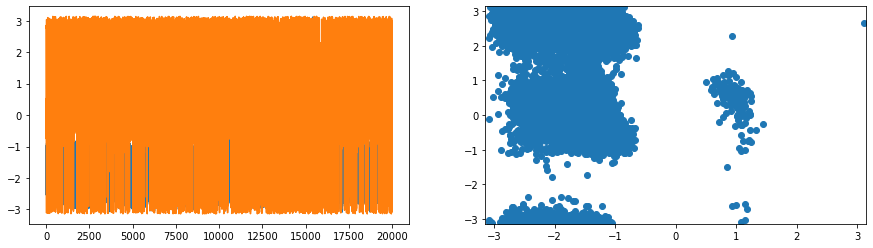

In [438]:
traj = md.load_dcd('./dialanine/diala_normal_traj.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')
#first one is phi. #second one is psi
indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_long = md.compute_dihedrals(traj, indices, periodic=True)
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].plot(dihedrals_long)
ax[1].scatter(dihedrals_long[:,0], dihedrals_long[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


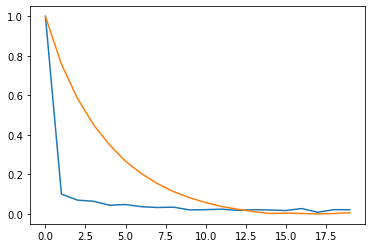

In [439]:
arg_real = dihedrals_long[:,0]
cexp = np.cos(arg_real) + 1j * np.sin(arg_real)
C_t = sm.tsa.stattools.acf(cexp, fft=True, unbiased=True, nlags=1000)
plt.plot(C_t[:20])

arg_real = dihedrals_long[:,1]
cexp = np.cos(arg_real) + 1j * np.sin(arg_real)
C_t = sm.tsa.stattools.acf(cexp, fft=True, unbiased=True, nlags=1000)
plt.plot(C_t[:20])

722.0


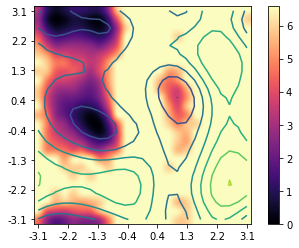

In [441]:
normal=True
gridSize = 25
myHistogram = np.zeros([gridSize,gridSize])

dihedrals = dihedrals_normal.copy()
if normal:
    for dihedral in dihedrals:
        point = np.array((dihedral+np.pi)/(np.pi*2) * gridSize, dtype=int)
        myHistogram[point[0], point[1]]+= 1#value
        
    temp = (myHistogram/np.max(myHistogram))
    print(np.max(myHistogram))
    
plt.figure()
#plt.imshow(np.log(myHistogram.T+1), origin='lower')
plt.imshow(-np.log(temp+np.min(temp[temp!=0])).T, origin='lower', interpolation='mitchell', cmap='magma')
plt.colorbar()
_ = plt.xticks(np.linspace(0, gridSize-1, 8), [str(np.around(i, 1)) for i in np.linspace(-np.pi, np.pi, 8)])
_ = plt.yticks(np.linspace(0, gridSize-1, 8), [str(np.around(i, 1)) for i in np.linspace(-np.pi, np.pi, 8)])
plt.contour(np.load('fe.npy'))

# standardMD: Unscaled:

## standardMD: Scatterplot of phi, psi angles 

(-3.141592653589793, 3.141592653589793)

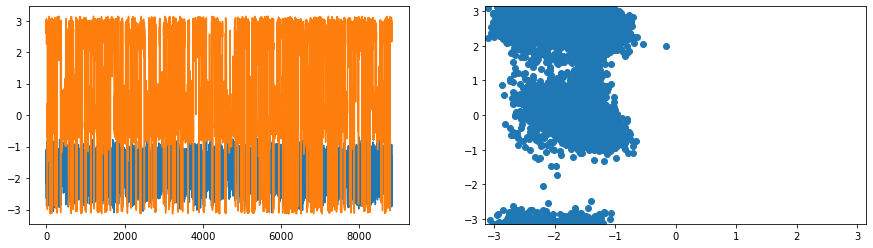

In [321]:
traj = md.load_dcd('./dialanine/diala_normal_traj_local.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')
#first one is phi. #second one is psi
indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_normal = md.compute_dihedrals(traj, indices, periodic=True)
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].plot(dihedrals_normal)
ax[1].scatter(dihedrals_normal[:,0], dihedrals_normal[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

## standardMD: Autocorrelation function of complex exponential

/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


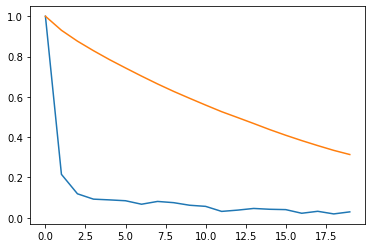

In [322]:
arg_real = dihedrals_normal[:,0]
cexp = np.cos(arg_real) + 1j * np.sin(arg_real)
C_t = sm.tsa.stattools.acf(cexp, fft=True, unbiased=True, nlags=1000)
plt.plot(C_t[:20])

arg_real = dihedrals_normal[:,1]
cexp = np.cos(arg_real) + 1j * np.sin(arg_real)
C_t = sm.tsa.stattools.acf(cexp, fft=True, unbiased=True, nlags=1000)
plt.plot(C_t[:20])

## standardMD: Free energy surface:

332.0


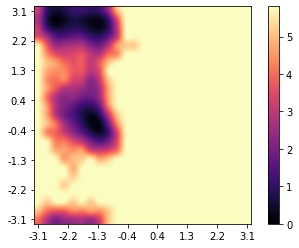

In [323]:
normal=True
gridSize = 25
myHistogram = np.zeros([gridSize,gridSize])

dihedrals = dihedrals_normal.copy()
if normal:
    for dihedral in dihedrals:
        point = np.array((dihedral+np.pi)/(np.pi*2) * gridSize, dtype=int)
        myHistogram[point[0], point[1]]+= 1#value
        
    temp = (myHistogram/np.max(myHistogram))
    print(np.max(myHistogram))
    
plt.figure()
#plt.imshow(np.log(myHistogram.T+1), origin='lower')
plt.imshow(-np.log(temp+np.min(temp[temp!=0])).T, origin='lower', interpolation='mitchell', cmap='magma')
plt.colorbar()
_ = plt.xticks(np.linspace(0, gridSize-1, 8), [str(np.around(i, 1)) for i in np.linspace(-np.pi, np.pi, 8)])
_ = plt.yticks(np.linspace(0, gridSize-1, 8), [str(np.around(i, 1)) for i in np.linspace(-np.pi, np.pi, 8)])


# GST: Serial tempered:
## GST: Phi, psi scatterplot

(-3.141592653589793, 3.141592653589793)

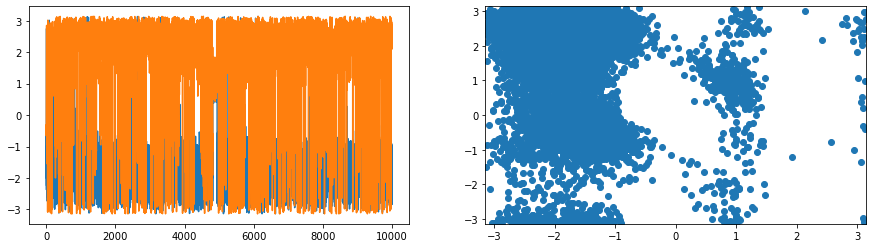

In [414]:
traj = md.load_dcd('./dialanine/diala_gst_traj_local.dcd', top='./dialanine/alanine-dipeptide-implicit.pdb')

indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_gst = md.compute_dihedrals(traj, indices, periodic=True)
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].plot(dihedrals_gst)
ax[1].scatter(dihedrals_gst[:,0], dihedrals_gst[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)

## GST: autocorrelation:


/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/lmar3213/miniconda3/envs/lew_conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


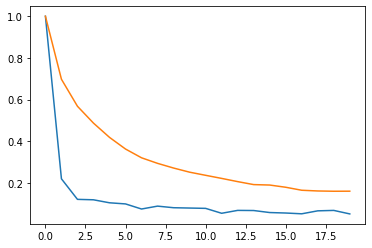

In [415]:
arg_real = dihedrals_gst[:,0]
cexp = np.cos(arg_real) + 1j * np.sin(arg_real)
C_t = sm.tsa.stattools.acf(cexp, fft=True, unbiased=True, nlags=1000)
plt.plot(C_t[:20])

arg_real = dihedrals_gst[:,1]
cexp = np.cos(arg_real) + 1j * np.sin(arg_real)
C_t = sm.tsa.stattools.acf(cexp, fft=True, unbiased=True, nlags=1000)
plt.plot(C_t[:20])

## GST: free energy surface

In [416]:
we = pd.read_csv('./dialanine/diala_gst_temp_local2.dat', sep='\t', index_col=None)

minTemperature = 310
maxTemperature = 1100
numTemperatures = 12
temperatures = sorted(we['Temperature (K)'].unique())
#temperatures = [minTemperature*((float(maxTemperature)/minTemperature)**(i/float(numTemperatures-1))) for i in range(numTemperatures)]
MOLAR_GAS_CONSTANT_R = 8.314472471220217
inverseTemperatures = [1.0/(MOLAR_GAS_CONSTANT_R*t) for t in temperatures]

In [417]:
idx = min(len(we), len(dihedrals_gst))

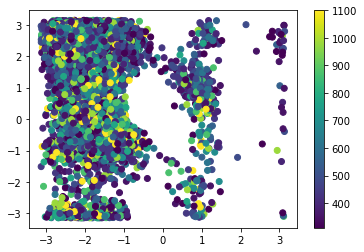

In [418]:
plt.scatter(dihedrals_gst[:idx][:,0], dihedrals_gst[:idx][:,1], c=we['Temperature (K)'].iloc[:idx])
plt.colorbar()

In [419]:
##Calculate the relative temperatures between stages:
#this is what you use as the multiplying factor
for i in range(len(inverseTemperatures)-1):
    print(inverseTemperatures[i+1]/inverseTemperatures[i])

0.8912450981519601
0.8912450803542147
0.891245618241816
0.8912441739767569
0.8912466169887028
0.8912449175901902
0.8912446778620673
0.891245304825195
0.8912446351931331
0.8912451421402123
0.8912454545454546


In [442]:
gridSize = 25
myHistogram = np.zeros([gridSize,gridSize])

for temp in temperatures[::-1]: #remember to start from the highest temperature and go down!
    mask = (we['Temperature (K)'].iloc[:idx]==temp)
    di = dihedrals_gst[:idx][mask]
    values = np.array((di+np.pi)/(2*np.pi)*gridSize, dtype=int)
    myHistogram *=0.8912450981519601
    print(temp, np.sum(myHistogram))
    for v in values:
        myHistogram[v[0], v[1]]+=1

1100.0 0.0
980.37 589.1130098784456
873.75 1126.634523564285
778.725 1705.5173887810306
694.035 2182.2291204909307
618.555 2652.5496146146616
551.284 3113.608969175986
491.33 3599.3904471306378
437.895 4006.494700284329
390.272 4576.093233115626
347.82800000000003 4993.729378502718
310.0 5170.762869394766


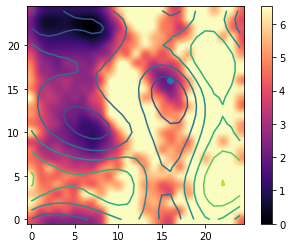

In [443]:
temp = (myHistogram/np.max(myHistogram))
plt.imshow(-np.log(temp+np.min(temp[temp!=0])).T, origin='lower', interpolation='mitchell', cmap='magma')
#plt.pcolormesh(-np.log(temp+np.min(temp[temp!=0])).T)
plt.colorbar()
plt.scatter(16,16)
#_ = plt.xticks(np.linspace(0, gridSize-1, 8), [str(np.around(i, 1)) for i in np.linspace(-np.pi, np.pi, 8)])
#_ = plt.yticks(np.linspace(0, gridSize-1, 8), [str(np.around(i, 1)) for i in np.linspace(-np.pi, np.pi, 8)])
plt.contour(np.load('fe.npy'))

In [394]:
histo=-np.log(temp+np.min(temp[temp!=0])).T

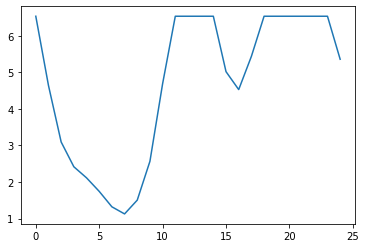

In [395]:
plt.plot(histo[10])

In [399]:
histo[16,16]

2.4086055024651745

In [383]:
(temp)[30, 15]-(temp)[15, 15]

IndexError: index 30 is out of bounds for axis 0 with size 25

# Metadynamics:

(-3.141592653589793, 3.141592653589793)

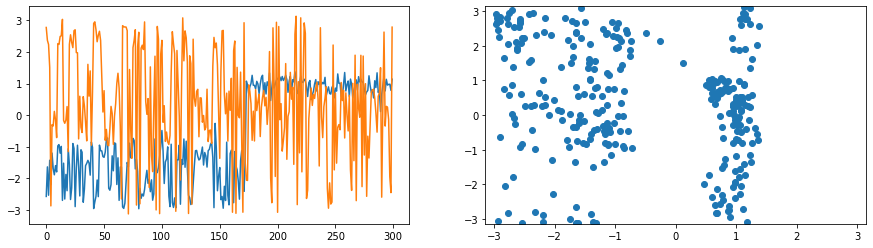

In [445]:
traj = md.load_dcd('./alanine_dipeptide/diala_metad_traj_local.dcd', top='./alanine_dipeptide/alanine-dipeptide-implicit.pdb')

indices = np.array([[4, 6, 8, 14],[6, 8, 14, 16]])
dihedrals_metad = md.compute_dihedrals(traj, indices, periodic=True)
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].plot(dihedrals_metad)
ax[1].scatter(dihedrals_metad[:,0], dihedrals_metad[:,1])
ax[1].set_ylim(-np.pi, np.pi)
ax[1].set_xlim(-np.pi, np.pi)


# PYMBAR:

In [297]:
from pymbar import testsystems
[x_n, u_kn, N_k, s_n] = testsystems.HarmonicOscillatorsTestCase().sample()

In [343]:
N_k

array([10, 20, 30, 40, 50], dtype=int32)

In [313]:
#oscillator positions, cocatenated: x_n
#reduced potentials, (nstates, nsamples): u_kn
#state indexer: s_n

In [317]:
potential_energy = we['PotentialEnergy']
temperat = we['Temperature (K)']

In [326]:
indexer = dict()
for i, temp in enumerate(temperatures):
    indexer[temp]=i

In [352]:
my_u_kn = np.zeros([len(temperatures), idx])
my_s_n = np.zeros(idx).astype(int)
my_N_k = np.zeros(len(temperatures)).astype(int)

In [353]:
for column, temp, pe in zip(range(10000), temperat, potential_energy):
    row = indexer[temp]
    my_u_kn[row, column] = pe
    _row = row+1
    while _row<=11:
        my_u_kn[_row, column] = my_u_kn[_row-1, column]/0.8912450981519601
        _row+=1
    _row = row-1
    while _row>=0:
        my_u_kn[_row, column] = my_u_kn[_row+1, column]*0.8912450981519601
        _row-=1
    my_s_n[column]=row
    my_N_k[row]+=1

In [362]:
from pymbar import MBAR
mbar = MBAR(my_u_kn, my_N_k)

In [363]:
results = mbar.getFreeEnergyDifferences(return_dict=True)

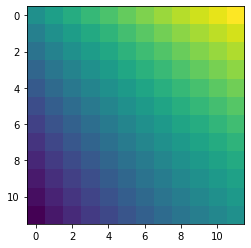

In [364]:
plt.imshow(results['Delta_f'])

In [367]:
results = mbar.computeExpectations(dihedrals_gst[:,0], return_dict=True)

In [371]:
results

{'mu': array([-1.54961899, -1.56467065, -1.58720305, -1.59608981, -1.61453529,
        -1.634773  , -1.64102552, -1.64315434, -1.6438809 , -1.6294803 ,
        -1.61867952, -1.63629067]),
 'sigma': array([0.03404504, 0.02277482, 0.01880362, 0.01743444, 0.01676856,
        0.01569284, 0.01533176, 0.01505446, 0.01506116, 0.01567968,
        0.01611104, 0.02049756])}

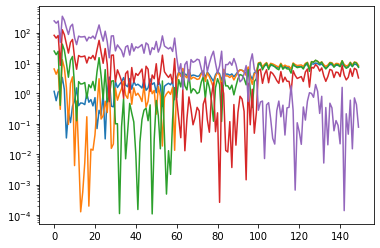

In [311]:
plt.plot(u_kn.T)
plt.yscale('log')

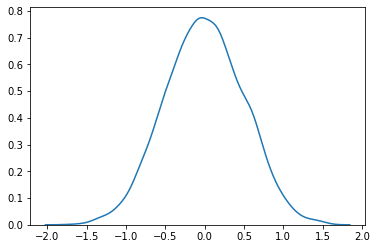

In [446]:
import scipy.stats
from seaborn import kdeplot
kdeplot(scipy.stats.norm(0, 0.5).rvs(5000))

# This is the results using normal gst temperatures:

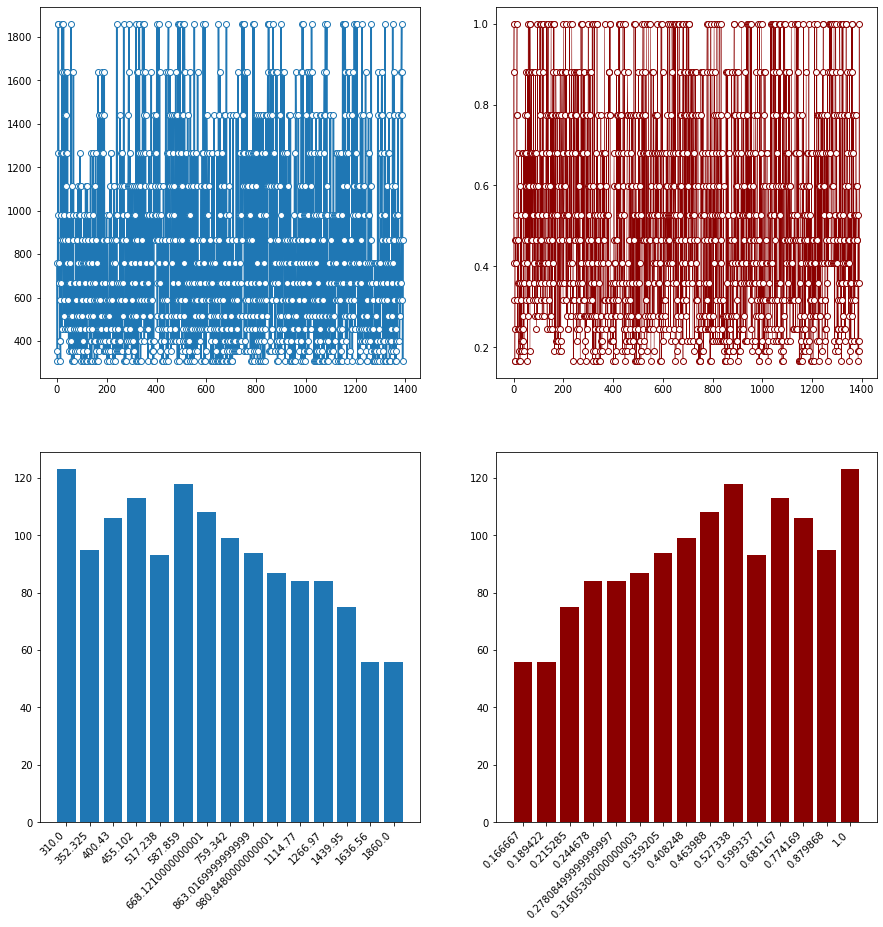

In [406]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
we = pd.read_csv('./dialanine/diala_gst_temp2.dat', sep='\t', index_col=None)
ax[0,0].plot(we['Temperature (K)'], '-o', mfc='white')

values, counts=np.unique(np.array(we['Temperature (K)']), return_counts=True)
_=ax[1,0].bar(np.arange(len(values)),counts)
_=ax[1,0].set_xticks(np.arange(len(values)))
_=ax[1,0].set_xticklabels(values, rotation=45, ha='right')


ax[0,1].plot(we['Scaling'], '-o', mfc='white', c='darkred', linewidth=0.5)

values, counts=np.unique(np.array(we['Scaling']), return_counts=True)
_=ax[1,1].bar(np.arange(len(values)),counts, color='darkred')
_=ax[1,1].set_xticks(np.arange(len(values)))
_=ax[1,1].set_xticklabels(values, rotation=45, ha='right')

# And results using 50-310

In [13]:
we

,Steps,Temperature (K),PotentialEnergy,Scaling,310K Weight,346.953K Weight,388.311K Weight,434.6K Weight,486.406K Weight,544.387K Weight,609.28K Weight,681.909K Weight,763.195K Weight,854.171K Weight,955.992K Weight,1069.95K Weight,1197.49K Weight,1340.24K Weight,1500K Weight
0,500,310.000,50.5011,1.000000,0,0.00000,1.00000,1.00000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1000,310.000,48.5306,1.000000,0,0.00000,2.00000,2.00000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000
2,1500,388.311,46.6698,0.798328,0,-1.00000,1.00000,2.00000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000
3,2000,388.311,51.4146,0.798328,0,0.00000,1.00000,3.00000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000
4,2500,310.000,44.0151,1.000000,0,2.00000,3.00000,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,1517500,854.171,53.3346,0.362925,0,4.01904,7.20850,9.82031,12.2168,14.0303,15.7361,17.2463,18.5952,19.6135,20.4253,21.2727,21.9248,22.5486,22.9553
3035,1518000,1340.240,65.9806,0.231302,0,4.01904,7.20850,9.82031,12.2168,14.0303,15.7361,17.2463,18.5952,19.6133,20.4253,21.2727,21.9248,22.5483,22.9553
3036,1518500,544.387,65.1812,0.569448,0,4.01904,7.20850,9.82031,12.2168,14.0300,15.7361,17.2463,18.5952,19.6133,20.4253,21.2725,21.9248,22.5483,22.9553
3037,1519000,388.311,88.9173,0.798328,0,4.01904,7.20825,9.82031,12.2168,14.0300,15.7361,17.2463,18.5952,19.6133,20.4253,21.2725,21.9248,22.5483,22.9551


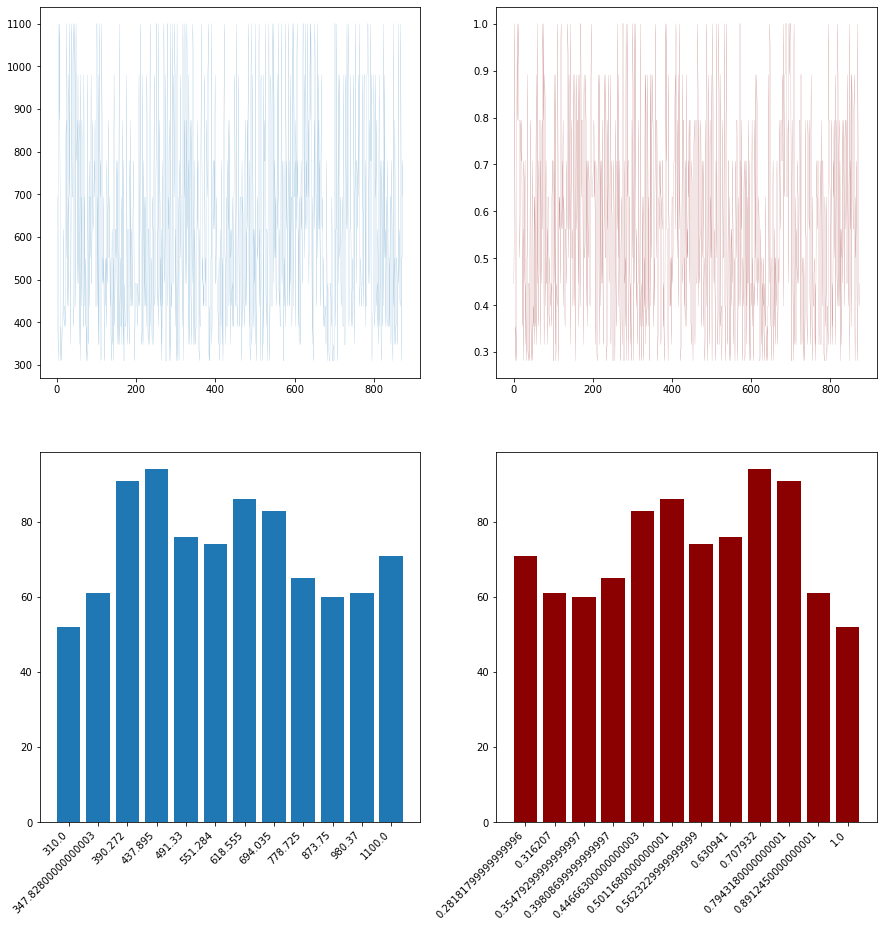

In [168]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
we = pd.read_csv('./dialanine/diala_gst_temp_local2.dat', sep='\t', index_col=None)

#ax[0,0].plot(we['Temperature (K)'], '-o', mfc='white', linewidth=0.1)
ax[0,0].plot(we['Temperature (K)'],  linewidth=0.1)
#we = we.iloc[-450:]
values, counts=np.unique(np.array(we['Temperature (K)']), return_counts=True)
_=ax[1,0].bar(np.arange(len(values)),counts)
_=ax[1,0].set_xticks(np.arange(len(values)))
_=ax[1,0].set_xticklabels(values, rotation=45, ha='right')


#ax[0,1].plot(we['Scaling'], '-o', mfc='white', c='darkred', linewidth=0.5)
ax[0,1].plot(we['Scaling'],  c='darkred', linewidth=0.1)

values, counts=np.unique(np.array(we['Scaling']), return_counts=True)
_=ax[1,1].bar(np.arange(len(values)),counts, color='darkred')
_=ax[1,1].set_xticks(np.arange(len(values)))
_=ax[1,1].set_xticklabels(values, rotation=45, ha='right')


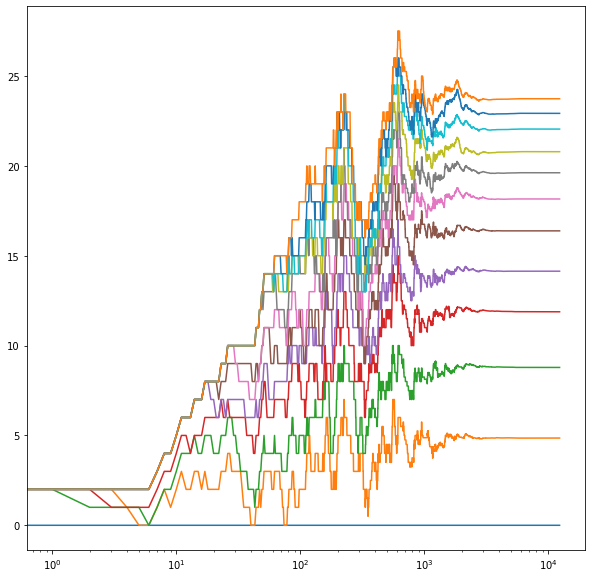

In [166]:
we = pd.read_csv('./dialanine/diala_gst_temp_local.dat', sep='\t', index_col=None)
plt.figure(figsize=(10,10))
for col in we.columns[4:]:
    plt.plot(we[col])
#plt.yscale('log')
plt.xscale('log')